In [38]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [39]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [40]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [41]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    y = y.reshape(-1, 1)
    N = len(y)
   # Compute the prediction (tx * w)
    e = y - np.dot(tx, w).reshape(-1, 1)  # e = y - Xw (the residuals)
    # Compute the MSE loss
    loss = 1/N * np.dot(e.T,e)
    return loss

In [42]:
w = np.array([[1], [2]])
loss = compute_loss(y,tx,w)
print(loss)

[[5388.96673177]]


# 2. Grid Search

Fill in the function `grid_search()` below:

In [43]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # Perform grid search
    for i, w0 in enumerate(grid_w0): # i is the index, w0 the value
        for j, w1 in enumerate(grid_w1):
            w = np.array([w0, w1]).reshape(-1, 1)  # Create a column vector [w0, w1]
            losses[i, j] = compute_loss(y, tx, w)
    
    min_loss_idx = np.unravel_index(np.argmin(losses), losses.shape)
    w0_star = grid_w0[min_loss_idx[0]]
    w1_star = grid_w1[min_loss_idx[1]]
    min_loss = losses[min_loss_idx]
    
    print(f"Minimum loss: {min_loss}")
    print(f"Optimal w0: {w0_star}, Optimal w1: {w1_star}")

    # Plot the results
    #fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
    #fig.set_size_inches(10.0, 6.0)
    #fig.savefig("grid_plot")  # Optional saving
    
    return losses

Let us play with the grid search demo now!

/var/folders/0m/t98q9lwj7r59mrxwrbcg977h0000gn/T/ipykernel_85930/977890086.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  losses[i, j] = compute_loss(y, tx, w)


Minimum loss: 84.84896629356491
Optimal w0: 66.66666666666669, Optimal w1: 16.666666666666686
Grid Search: loss*=84.84896629356491, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.011 seconds


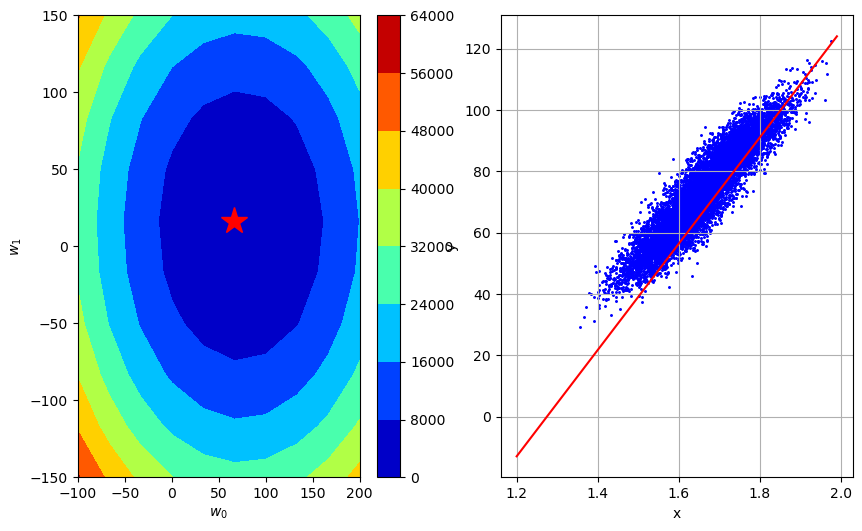

In [44]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [45]:
#y = np.array([1, 2, 3])             # True values (N = 3)
#tx = np.array([[1, 2],                # Input data matrix (N = 3, d = 2)
#               [1, 3],
#               [1, 4]])
#w = np.array([0.5, 0.5]) 

In [47]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # Compute the residuals: e = y - Xw
    y=y.reshape(-1, 1)
    e = y - np.dot(tx, w).reshape(-1, 1)
    # Compute the gradient:
    gradient = -np.dot(tx.T, e) / len(y)
    
    return gradient

In [48]:
gradient = compute_gradient(y,tx,w)
print(gradient)

[[-72.293922  ]
 [-11.47971243]]


Please fill in the functions `gradient_descent` below:

In [54]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    initial_w = initial_w.reshape(-1, 1)
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # Compute gradient and loss
        grad = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)

        # Update w by gradient
        w = w.reshape(-1, 1) - gamma * grad.reshape(-1, 1)

        # Store w and loss
        ws.append(w)
        losses.append(loss)

        # store w and loss
        ws.append(w)
        losses.append(loss)
        #print(
        #    "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
        #        bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
        #    )
        #)

    return losses, ws


Test your gradient descent function through gradient descent demo shown below:

In [55]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD: execution time=0.014 seconds


In [56]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [57]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # ***************************************************
    raise NotImplementedError


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    initial_w=initial_w.reshape(-1, 1)
    ws = [initial_w]
    losses = []
    w = initial_w
    batch_size=32
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size, num_batches=1):
            # Compute gradient and loss
            grad = compute_gradient(minibatch_y, minibatch_tx, w)
            loss = compute_loss(minibatch_y, minibatch_tx, w)
            
            # Update w by gradient
            w = w.reshape(-1, 1) - gamma * grad.reshape(-1, 1)
            
        # Store w and loss
        ws.append(w)
        losses.append(loss)
        
        #print(
        #    "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
        #        bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
        #    )
        #)
        
    return losses, ws

In [58]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=0.002 seconds


In [59]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

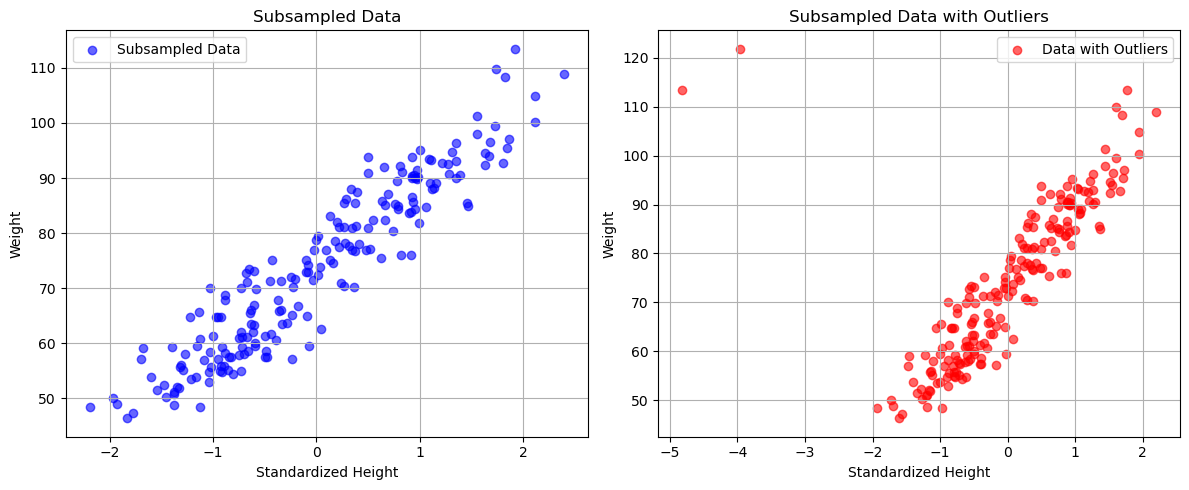

In [62]:
import datetime
from helpers import *

# Load data with subsampling only
height, weight, gender = load_data(sub_sample=True, add_outlier=False)

# Load data with subsampling and adding outliers
height_outliers, weight_outliers, gender_outliers = load_data(sub_sample=True, add_outlier=True)

# Standardize the heights (subsampled data) and build model data (subsampled data)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

# For the dataset with outliers
x_outliers, mean_x_outliers, std_x_outliers = standardize(height_outliers)
y_outliers, tx_outliers = build_model_data(x_outliers, weight_outliers)

# Displaying standardized data for verification
plt.figure(figsize=(12, 5))

# Subsampled data plot
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', alpha=0.6, label='Subsampled Data')
plt.title('Subsampled Data')
plt.xlabel('Standardized Height')
plt.ylabel('Weight')
plt.grid(True)
plt.legend()

# Subsampled data with outliers plot
plt.subplot(1, 2, 2)
plt.scatter(x_outliers, y_outliers, color='red', alpha=0.6, label='Data with Outliers')
plt.title('Subsampled Data with Outliers')
plt.xlabel('Standardized Height')
plt.ylabel('Weight')
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [63]:
y.shape, tx.shape

((200,), (200, 2))

In [65]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# Fit the model to the subsampled data
losses, ws = gradient_descent(y, tx, w_initial, max_iters, gamma)

# Fit the model to the subsampled data with outliers
losses_outliers, ws_outliers = gradient_descent(y_outliers, tx_outliers, w_initial, max_iters, gamma)


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD: execution time=0.002 seconds


In [66]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [68]:
import numpy as np

def compute_loss(y, tx, w, loss_type='mae'):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N,)
        tx: numpy array of shape=(N, 2)
        w: numpy array of shape=(2,). The vector of model parameters.
        loss_type: str, 'mse' or 'mae', to specify which loss function to use.

    Returns:
        The value of the loss (a scalar), corresponding to the input parameters w.
    """
    y = y.reshape(-1, 1)
    N = len(y)
    # Compute the prediction (tx * w)
    e = y - np.dot(tx, w).reshape(-1, 1)  # e = y - Xw (the residuals)

    if loss_type.lower() == 'mse':
        # Compute the MSE loss
        loss = (1 / (2 * N)) * np.dot(e.T, e).item()  # Adjust to return a scalar
    elif loss_type.lower() == 'mae':
        # Compute the MAE loss
        loss = np.mean(np.abs(e))
    else:
        raise ValueError("Invalid loss_type. Use 'mse' or 'mae'.")

    return loss


In [69]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # Compute the error vector
    e = y - tx.dot(w)

    # Compute the sign of each error, subgradient is -sign(e) * tx
    subgradient = -np.dot(tx.T, np.sign(e)) / len(y)

    return subgradient

In [70]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # Compute subgradient and loss
        subgradient = compute_subgradient_mae(y, tx, w)
        loss = compute_loss(y, tx, w, loss_type='mae')

        # Update w by subgradient
        w = w - gamma * subgradient

        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [71]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=73.63227245973114, w0=0.7, w1=1.689537398874563e-15
SubGD iter. 1/499: loss=72.93227245973114, w0=1.4, w1=3.379074797749126e-15
SubGD iter. 2/499: loss=72.23227245973115, w0=2.0999999999999996, w1=5.068612196623689e-15
SubGD iter. 3/499: loss=71.53227245973116, w0=2.8, w1=6.758149595498252e-15
SubGD iter. 4/499: loss=70.83227245973114, w0=3.5, w1=8.447686994372815e-15
SubGD iter. 5/499: loss=70.13227245973114, w0=4.2, w1=1.0137224393247379e-14
SubGD iter. 6/499: loss=69.43227245973115, w0=4.9, w1=1.1826761792121942e-14
SubGD iter. 7/499: loss=68.73227245973115, w0=5.6000000000000005, w1=1.3516299190996506e-14
SubGD iter. 8/499: loss=68.03227245973115, w0=6.300000000000001, w1=1.5205836589871068e-14
SubGD iter. 9/499: loss=67.33227245973114, w0=7.000000000000001, w1=1.689537398874563e-14
SubGD iter. 10/499: loss=66.63227245973115, w0=7.700000000000001, w1=1.8584911387620192e-14
SubGD iter. 11/499: loss=65.93227245973114, w0=8.4, w1=2.0274448786494754e-14
SubGD it

In [72]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [73]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # Randomly shuffle the data and select a mini-batch
        indices = np.random.choice(len(y), batch_size, replace=False)
        y_batch = y[indices]
        tx_batch = tx[indices]

        # Compute subgradient and loss using the mini-batch
        subgradient = compute_subgradient_mae(y_batch, tx_batch, w)
        loss = compute_loss(y_batch, tx_batch, w, loss_type='mae')

        # Update w by subgradient
        w = w - gamma * subgradient

        # Store w and loss
        ws.append(w)
        losses.append(loss)

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [74]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=73.41075283858797, w0=0.7, w1=-0.4576819500281538
SubSGD iter. 1/499: loss=56.75545500923543, w0=1.4, w1=-0.9797400523349725
SubSGD iter. 2/499: loss=46.6817589387585, w0=2.0999999999999996, w1=-2.3567885380874847
SubSGD iter. 3/499: loss=58.01968587081881, w0=2.8, w1=-2.7040771746426775
SubSGD iter. 4/499: loss=56.75248522491749, w0=3.5, w1=-2.9789837848441776
SubSGD iter. 5/499: loss=75.4675148444226, w0=4.2, w1=-2.788613700988708
SubSGD iter. 6/499: loss=89.27922882577482, w0=4.9, w1=-2.209377695902183
SubSGD iter. 7/499: loss=83.8832142830704, w0=5.6000000000000005, w1=-1.9725836594510595
SubSGD iter. 8/499: loss=73.32069116592469, w0=6.300000000000001, w1=-1.8477393885347129
SubSGD iter. 9/499: loss=58.42018874428645, w0=7.000000000000001, w1=-1.9098381374635178
SubSGD iter. 10/499: loss=55.89865696074567, w0=7.700000000000001, w1=-2.5791360378414168
SubSGD iter. 11/499: loss=41.969556979020915, w0=8.4, w1=-3.696076535040388
SubSGD iter. 12/499: loss=88.94

In [75]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>